# Sources:
* Dataset at Hugging Face: https://huggingface.co/datasets/polyglot_ner
* Polyglot documentation: https://polyglot.readthedocs.io/en/latest/NamedEntityRecognition.html
* Freezing embeddings: https://discuss.huggingface.co/t/how-to-freeze-some-layers-of-bertmodel/917

# Explore Polyglot

In [1]:
!pip install polyglot
!pip install pyicu
!pip install pycld2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52558 sha256=a14b7e5f49cfb28f0c13df32d4362f616e03064a3a62124199a8fe7492368e83
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.12-cp310-cp310-linux_x86_64.whl size=1754542 sha256=b4a0bdf3e247420d59cf5ee6e9dc9fa666f8bfa637ce7ca7e1a43a2138a7c39b
  Stored in directory: /root/.cache/pip/wheels/74/60/95/66d97ac2fdc8be8e526c4254047405fe77feaf064282d1ad07
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 42.8 MB/s eta 

In [2]:
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 3))

  1. Italian                    2. Hindi                      3. French                   
  4. Spanish; Castilian         5. Vietnamese                 6. Arabic                   
  7. Bulgarian                  8. Norwegian                  9. Estonian                 
 10. Japanese                  11. Greek, Modern             12. Slovene                  
 13. Korean                    14. Serbian                   15. Finnish                  
 16. Catalan; Valencian        17. Croatian                  18. Dutch                    
 19. Swedish                   20. Tagalog                   21. Danish                   
 22. Latvian                   23. Ukrainian                 24. Romanian, Moldavian, ... 
 25. Persian                   26. Slovak                    27. Portuguese               
 28. English                   29. Malay                     30. Polish                   
 31. German                    32. Indonesian                33. Chinese                  

In [3]:
!pip install morfessor

In [4]:
from polyglot.text import Text

# Download the Spanish NER dataset
embeds = downloader.download("embeddings2.es")
ner = downloader.download("ner2.es")

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


In [5]:
# Check if the download was successful
if ner:
    # Load the Spanish NER dataset
    es_ner_example = Text("Obama está en España.", hint_language_code='es')
    print('Following entities found:\n')
    # Access the entities
    for entity in es_ner_example.entities:
        print(entity)

    # Print features and number of entities
    print("Number of entities:", len(es_ner_example.entities))
else:
    print("Download failed. Please check your internet connection or try again later.")

Following entities found:

['Obama']
['España']
Number of entities: 2


-----

# TODO:
Implement a `named entity recognition` system in Spanish. Use HuggingFace’s BertForTokenClassification-class and initialize it with a pretrained Hugging Face BERT-base Spanish-language model. The HuggingFace guide for fine-tuning
serves as a good starting point. Before passing the data to the model, we will need to encode it using a HuggingFace tokenizer. We will use
the tokenizer corresponding to our BERT model. When provided with the right arguments, the tokenizer can also pad and truncate
the input.


Later, we will use the datasets-library to extract two training sets, one containing 1,000 sentences and one containing 3,000 sentences. We will also extract an evaluation/test set of 2,000 sentences.

----

## Load the data

In [6]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.9 MB/s eta 0:00:00


In [7]:
import warnings
from datasets import load_dataset

warnings.filterwarnings('ignore')

# load the dataset and inspect its form
polyglot_ner_dataset = load_dataset("polyglot_ner")
print(polyglot_ner_dataset)

Generating train split:   0%|          | 0/21070925 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'lang', 'words', 'ner'],
        num_rows: 21070925
    })
})


We need to make sure our Spanish dataset >= 7000 sentences

In [8]:
from collections import Counter

# count the number of sentences per language
lang_counts = Counter(polyglot_ner_dataset['train']['lang'])

# display sentence counts per language
for language, count in lang_counts.items():
    print(f"Language: {language}, Sentence Count: {count}")

Language: et, Sentence Count: 87023
Language: nl, Sentence Count: 520664
Language: es, Sentence Count: 386699
Language: ko, Sentence Count: 560105
Language: el, Sentence Count: 446052
Language: hr, Sentence Count: 629667
Language: id, Sentence Count: 463862
Language: uk, Sentence Count: 561373
Language: hu, Sentence Count: 590218
Language: ca, Sentence Count: 372665
Language: fr, Sentence Count: 418411
Language: tl, Sentence Count: 160750
Language: th, Sentence Count: 217631
Language: bg, Sentence Count: 559694
Language: pt, Sentence Count: 396773
Language: sk, Sentence Count: 500135
Language: vi, Sentence Count: 351643
Language: ru, Sentence Count: 551770
Language: de, Sentence Count: 547578
Language: fi, Sentence Count: 387465
Language: cs, Sentence Count: 564462
Language: he, Sentence Count: 459933
Language: da, Sentence Count: 546440
Language: sv, Sentence Count: 634881
Language: fa, Sentence Count: 492903
Language: ar, Sentence Count: 339109
Language: lv, Sentence Count: 331568
La

In [9]:
for language, count in lang_counts.items():
  our_lang = 'es'
  if language == our_lang:
    print(f"Sentence count for {our_lang} is {count} sentences.")
    if count >= 7000:
      print(f'Dataset for {our_lang} is long enough!')
    else:
      print(f'The dataset for {our_lang} is too short, sorry')

Sentence count for es is 386699 sentences.
Dataset for es is long enough!


Now that we have made sure that the Spanish part of the dataset is large enough, we can proceed with preprocessing, tokenizing/encoding, and trainings.

In this tutorial, we will work with the following model:
<br>`dccuchile/bert-base-spanish-wwm-cased`

In [10]:
# Filter the dataset to only include spanish
es_ner = polyglot_ner_dataset['train'].filter(lambda example: example['lang'] == 'es')

# inspect
print(es_ner)

Filter:   0%|          | 0/21070925 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'lang', 'words', 'ner'],
    num_rows: 386699
})


In [11]:
# remove to free up memory
import gc
del polyglot_ner_dataset
del lang_counts
gc.collect()

22

## Preprocess, tokenize, encode

In [12]:
# inspect lines
print(es_ner[10:11])

{'id': ['607697'], 'lang': ['es'], 'words': [['Al', 'fallecer', 'su', 'padre', ',', 'la', 'familia', 'se', 'fue', 'a', 'la', 'ruina', ',', 'y', 'los', 'González', 'Palacín', 'emigraron', 'a', 'América', 'con', 'la', 'intención', 'de', 'trabajar', 'en', 'las', 'tabacaleras', 'de', 'Tampa', ',', 'Florida', '.']], 'ner': [['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]}


We see that each NER tag (or ist absence) must be aligned to the corresponding token in the sequence.

We will use the tokenizer of the same base model as the one we are going to finetune on:
<br>`tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")`

In [13]:
# !pip uninstall transformers
# !pip uninstall transformers[torch]

In [14]:
!pip install transformers[torch] accelerate>=0.20.1

In [15]:
from transformers import AutoTokenizer
import torch


# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# define a function to tokenize and align labels
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples['words'], truncation=True, padding='max_length', is_split_into_words=True, max_length=150)


    labels = []
    for i, label in enumerate(examples['ner']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                # convert string labels --> int
                label_ids.append(label_to_id[label[word_idx]])
            else:
                # for subwords/wordpieces, set label to -100 (ignored in loss)
                label_ids.append(-100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

# Create a label_to_id dictionary
label_to_id = {label: i for i, label in enumerate(set([lbl for sublist in es_ner['ner'] for lbl in sublist]))}

# Apply the function to tokenize and align labels
tokenized_es_ner = es_ner.map(tokenize_and_align_labels, batched=True)


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

Map:   0%|          | 0/386699 [00:00<?, ? examples/s]

In [16]:
# inpsect the tokenized dataset
print(tokenized_es_ner[13])

{'id': '607700', 'lang': 'es', 'words': ['Cloverly', 'es', 'marcada', 'por', 'facies', 'marinas', 'transgresiva', ',', 'depositada', 'por', 'un', 'mar', 'interior', 'que', 'penetro', 'en', 'dirección', 'SurSe', 'la', 'divide', 'en', 'tres', 'miemnbros', 'Paleofauna', 'Anfibios', 'Reptiles', 'Tortugas', 'Lagartos', 'Arcosaurios', 'Dinosaurios', 'Saurischia', 'Ornithischia', 'Mamiferos', 'Fuentes', 'Referencias'], 'ner': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], 'input_ids': [4, 17706, 25740, 1058, 22163, 1096, 3270, 1019, 20943, 1703, 2118, 5057, 1017, 17756, 1138, 1096, 1049, 1487, 4082, 1038, 30343, 30933, 1036, 3575, 4529, 30960, 30931, 1030, 16149, 1036, 1941, 1691, 30935, 1702, 26901, 28547, 4080, 1532, 1622, 2338, 7512, 2572, 5477, 4382, 1126, 1723, 1198, 27785, 1011, 27704, 18473, 6297, 6697, 2454, 23902, 3053, 21854, 3187, 30932, 2419, 4940, 2087

Now that we have prepared the dataset to use for finetuning, we can proceed to loading the base model and defining the training loop. For simplicity, we will use the trainer here.

## Load the model

Since we are working with a tiny dataset and want to avoid overfitting, we will only train for 5 epochs.

In [42]:
from transformers import BertForTokenClassification, AutoTokenizer, TrainingArguments, Trainer

# load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# load the pretrained model, specifying the number of labels
# the number of labels is equal to the number of unique NER tags
num_labels = len(label_to_id)
model = BertForTokenClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=num_labels)

# define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5, # use the "standard" lr
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Fine-tune

We will use sklearn to evaluate the fine-tuned model. Clearly, the fine-tuning dataset is too small to have any reasonable effect on the performance, this is a "pet" example.

We will use **10%-test split** for this and all the other models.

In [18]:
!pip install plotly

Let's import all the packages at once. We will need them for each of the 3 models

In [19]:
from sklearn.metrics import accuracy_score, f1_score
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fine-tune on 1000 example

In [43]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = BertForTokenClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=num_labels)


train_1k = tokenized_es_ner.select(range(1000))
test_1k = tokenized_es_ner.select(range(1000, 1200))

# Define a function to compute metrics
def compute_f1(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    # Flatten the lists and exclude labels for special tokens (i.e., -100)
    flat_labels = [label for sublist in labels for label in sublist if label != -100]
    flat_preds = [pred for sublist, label_sublist in zip(preds, labels) for pred, label in zip(sublist, label_sublist) if label != -100]

    accuracy = accuracy_score(flat_labels, flat_preds)
    f1_micro = f1_score(flat_labels, flat_preds, average='micro')
    f1_macro = f1_score(flat_labels, flat_preds, average='macro')

    return {
        'accuracy': accuracy,
        'f1_micro': f1_micro,
        'f1_macro': f1_macro,
    }


# initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_1k,
    eval_dataset=test_1k,
    compute_metrics=compute_f1
)

# train
training_output_1k = trainer.train()

# evaluate
eval_results_1k = trainer.evaluate()
print(eval_results_1k)

# save locally
model.save_pretrained("./nerbert_es_1k_2")


Some weights of BertForTokenClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.113100,0.081246,0.969880,0.969880,0.742814
2,0.069800,0.076035,0.971574,0.971574,0.782959
3,0.039800,0.081074,0.968750,0.968750,0.754977
4,0.020500,0.089090,0.968185,0.968185,0.761378
5,0.022500,0.092688,0.970633,0.970633,0.777851


{'eval_loss': 0.09268782287836075, 'eval_accuracy': 0.9706325301204819, 'eval_f1_micro': 0.9706325301204819, 'eval_f1_macro': 0.7778511450980581, 'eval_runtime': 0.4727, 'eval_samples_per_second': 423.12, 'eval_steps_per_second': 8.462, 'epoch': 5.0}


In [44]:
eval_results_1k

{'eval_loss': 0.09268782287836075,
 'eval_accuracy': 0.9706325301204819,
 'eval_f1_micro': 0.9706325301204819,
 'eval_f1_macro': 0.7778511450980581,
 'eval_runtime': 0.4727,
 'eval_samples_per_second': 423.12,
 'eval_steps_per_second': 8.462,
 'epoch': 5.0}

In [45]:
print(training_output_1k)

TrainOutput(global_step=315, training_loss=0.07377644519484232, metrics={'train_runtime': 38.2228, 'train_samples_per_second': 130.812, 'train_steps_per_second': 8.241, 'total_flos': 382765842000000.0, 'train_loss': 0.07377644519484232, 'epoch': 5.0})


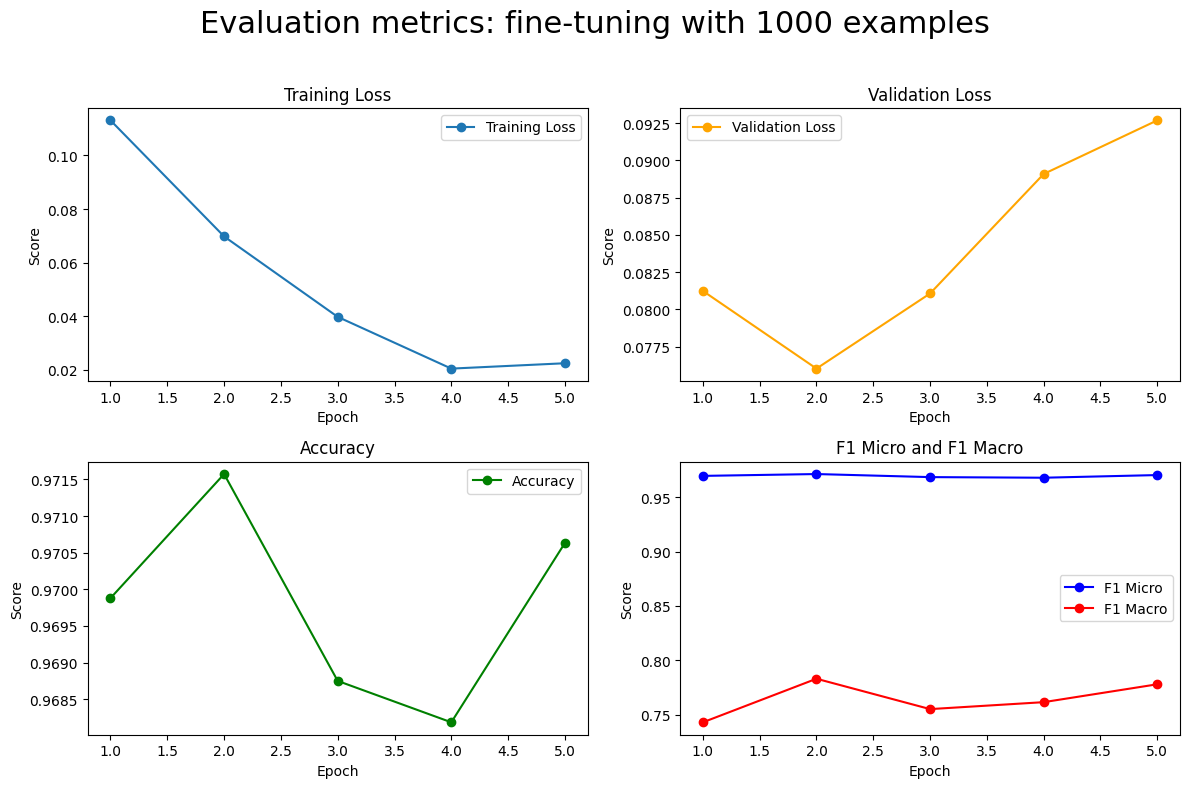

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO


data_str_1k = """
...
""" # TODO: paste your output here

# Use StringIO to convert the string to a DataFrame
df = pd.read_csv(StringIO(data_str_1k), delimiter='\t')

# Assuming df is your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Training Loss
axes[0, 0].plot(df['Epoch'], df['Training Loss'], marker='o', label='Training Loss')
axes[0, 0].set_title('Training Loss')

# Plot Validation Loss
axes[0, 1].plot(df['Epoch'], df['Validation Loss'], marker='o', label='Validation Loss', color='orange')
axes[0, 1].set_title('Validation Loss')

# Plot Accuracy
axes[1, 0].plot(df['Epoch'], df['Accuracy'], marker='o', label='Accuracy', color='green')
axes[1, 0].set_title('Accuracy')

# Plot F1 Micro and F1 Macro
axes[1, 1].plot(df['Epoch'], df['F1 Micro'], marker='o', label='F1 Micro', color='blue')
axes[1, 1].plot(df['Epoch'], df['F1 Macro'], marker='o', label='F1 Macro', color='red')
axes[1, 1].set_title('F1 Micro and F1 Macro')

# Add legend and show the plot
for ax in axes.flat:
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')

plt.suptitle("Evaluation metrics: fine-tuning with 1000 examples\n", fontsize=22)
plt.tight_layout()
plt.show()


## Fine-tune on 3000 examples

In [46]:
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
model = BertForTokenClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=num_labels)


train_3k = tokenized_es_ner.select(range(3000))
test_3k = tokenized_es_ner.select(range(3000, 3300))

# Initialize the Trainer with the training subset, test subset, and compute_metrics function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_3k,
    eval_dataset=test_3k,
    compute_metrics=compute_f1 # already defined in the previous section
)

# Train the model
trainer.train()

# Evaluate the model
eval_results_3k = trainer.evaluate()
print(eval_results_3k)

# Save the model
model.save_pretrained("./nerbert_es_3k")


Some weights of BertForTokenClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.056000,0.065216,0.974381,0.974381,0.784548
2,0.049200,0.066352,0.974506,0.974506,0.809138
3,0.035300,0.069966,0.974879,0.974879,0.802664
4,0.017600,0.082489,0.974133,0.974133,0.791544
5,0.011500,0.086750,0.974133,0.974133,0.790590


{'eval_loss': 0.0867503210902214, 'eval_accuracy': 0.974132570575799, 'eval_f1_micro': 0.974132570575799, 'eval_f1_macro': 0.790590107189402, 'eval_runtime': 0.693, 'eval_samples_per_second': 432.928, 'eval_steps_per_second': 7.215, 'epoch': 5.0}


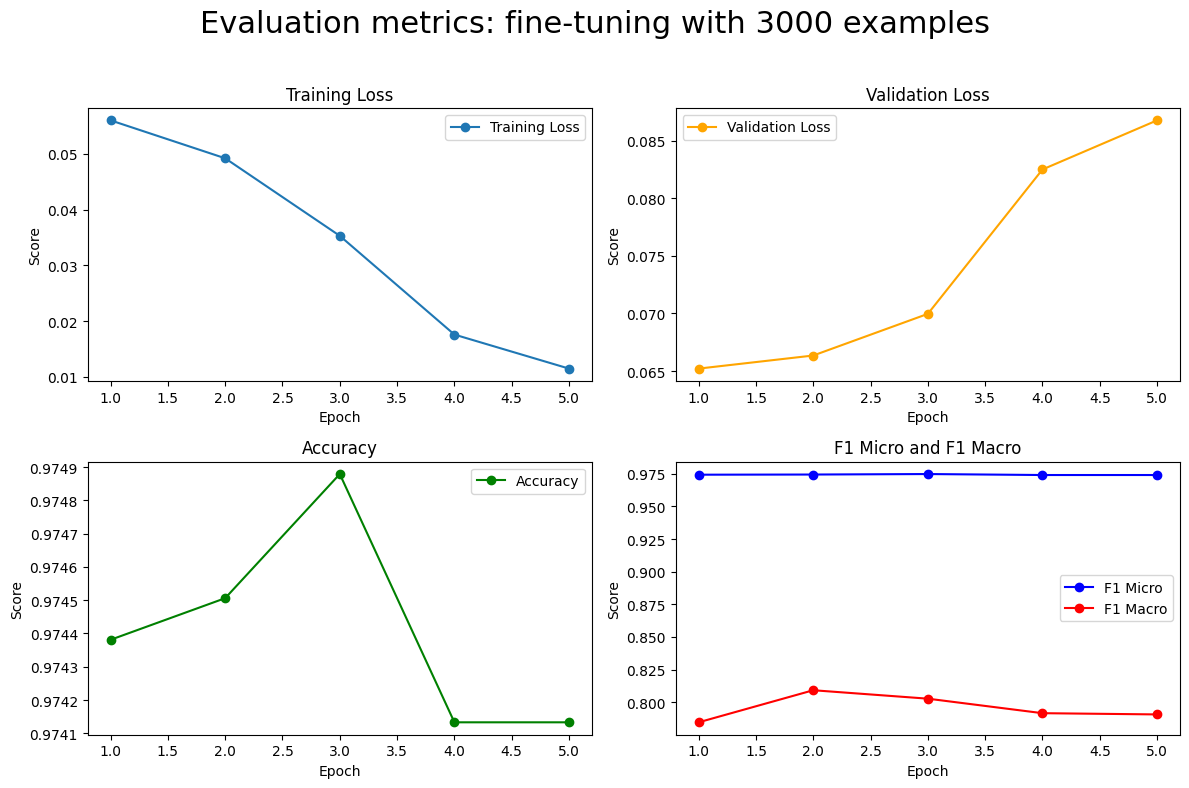

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO


data_str_3k = """
...
""" # TODO: paste your output here

# Use StringIO to convert the string to a DataFrame
df = pd.read_csv(StringIO(data_str_3k), delimiter='\t')

# Assuming df is your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Training Loss
axes[0, 0].plot(df['Epoch'], df['Training Loss'], marker='o', label='Training Loss')
axes[0, 0].set_title('Training Loss')

# Plot Validation Loss
axes[0, 1].plot(df['Epoch'], df['Validation Loss'], marker='o', label='Validation Loss', color='orange')
axes[0, 1].set_title('Validation Loss')

# Plot Accuracy
axes[1, 0].plot(df['Epoch'], df['Accuracy'], marker='o', label='Accuracy', color='green')
axes[1, 0].set_title('Accuracy')

# Plot F1 Micro and F1 Macro
axes[1, 1].plot(df['Epoch'], df['F1 Micro'], marker='o', label='F1 Micro', color='blue')
axes[1, 1].plot(df['Epoch'], df['F1 Macro'], marker='o', label='F1 Macro', color='red')
axes[1, 1].set_title('F1 Micro and F1 Macro')

# Add legend and show the plot
for ax in axes.flat:
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')

plt.suptitle("Evaluation metrics: fine-tuning with 3000 examples\n", fontsize=22)
plt.tight_layout()
plt.show()


## Fine-tune with 3000 examples AND frozen embeddings

For the last fine-tuning exercise, we will use the same setting as with the previous model, but we will keep embeddings "frozen".

What does this mean? This means that the embedding weights of the pretrained model are left untouched, and only other weights are influenced by training (fine-tuning).

In [48]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")

# load  pretrained model
num_labels = len(label_to_id)
model = BertForTokenClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", num_labels=num_labels)

# freeze the embeddings
for param in model.bert.embeddings.parameters():
    param.requires_grad = False

# Define training arguments (can be the same or adjusted)
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)


# Create a  subset of the dataset for training
train_3k_freeze = tokenized_es_ner.select(range(3000, 6000))
test_3k_freeze = tokenized_es_ner.select(range(6000, 6300))

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_3k_freeze,
    eval_dataset=test_3k_freeze,
    compute_metrics=compute_f1 # defined previously
)

# Train the model
trainer.train()

# Evaluate the model
eval_results_3k_frozen = trainer.evaluate()
print(eval_results_3k_frozen)

# Save the model
model.save_pretrained("./frozen_nerbert_es_3k")

Some weights of BertForTokenClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.090700,0.068177,0.971565,0.971565,0.779294
2,0.070700,0.068821,0.969972,0.969972,0.748543
3,0.040800,0.069108,0.972423,0.972423,0.788919
4,0.040000,0.076136,0.972791,0.972791,0.789626
5,0.021400,0.083238,0.971565,0.971565,0.774850


{'eval_loss': 0.08323785662651062, 'eval_accuracy': 0.9715651427871063, 'eval_f1_micro': 0.9715651427871063, 'eval_f1_macro': 0.7748504956763461, 'eval_runtime': 0.6918, 'eval_samples_per_second': 433.622, 'eval_steps_per_second': 7.227, 'epoch': 5.0}


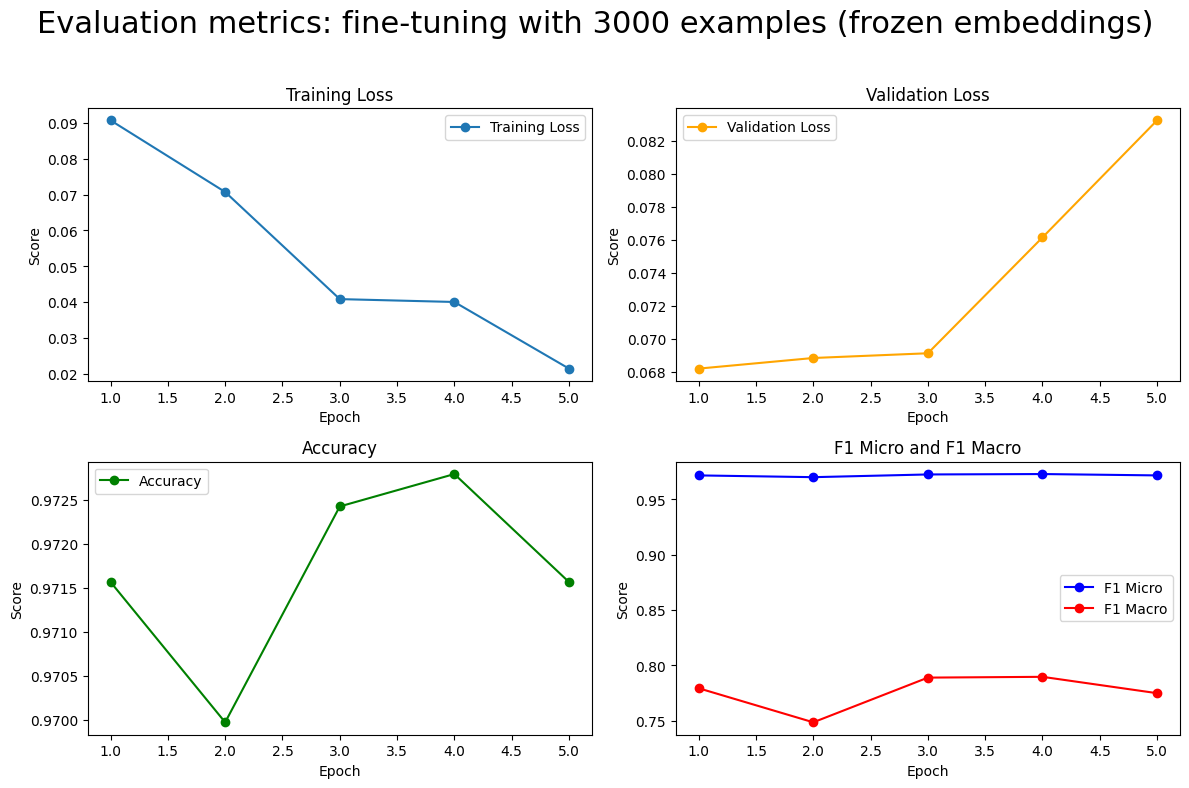

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO


data_str_3k_frozen = """
...
""" # TODO: paste your output here

# Use StringIO to convert the string to a DataFrame
df = pd.read_csv(StringIO(data_str_3k_frozen), delimiter='\t')

# Assuming df is your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Training Loss
axes[0, 0].plot(df['Epoch'], df['Training Loss'], marker='o', label='Training Loss')
axes[0, 0].set_title('Training Loss')

# Plot Validation Loss
axes[0, 1].plot(df['Epoch'], df['Validation Loss'], marker='o', label='Validation Loss', color='orange')
axes[0, 1].set_title('Validation Loss')

# Plot Accuracy
axes[1, 0].plot(df['Epoch'], df['Accuracy'], marker='o', label='Accuracy', color='green')
axes[1, 0].set_title('Accuracy')

# Plot F1 Micro and F1 Macro
axes[1, 1].plot(df['Epoch'], df['F1 Micro'], marker='o', label='F1 Micro', color='blue')
axes[1, 1].plot(df['Epoch'], df['F1 Macro'], marker='o', label='F1 Macro', color='red')
axes[1, 1].set_title('F1 Micro and F1 Macro')

# Add legend and show the plot
for ax in axes.flat:
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')

plt.suptitle("Evaluation metrics: fine-tuning with 3000 examples (frozen embeddings)\n", fontsize=22)
plt.tight_layout()
plt.show()


# Visualize Evaluation

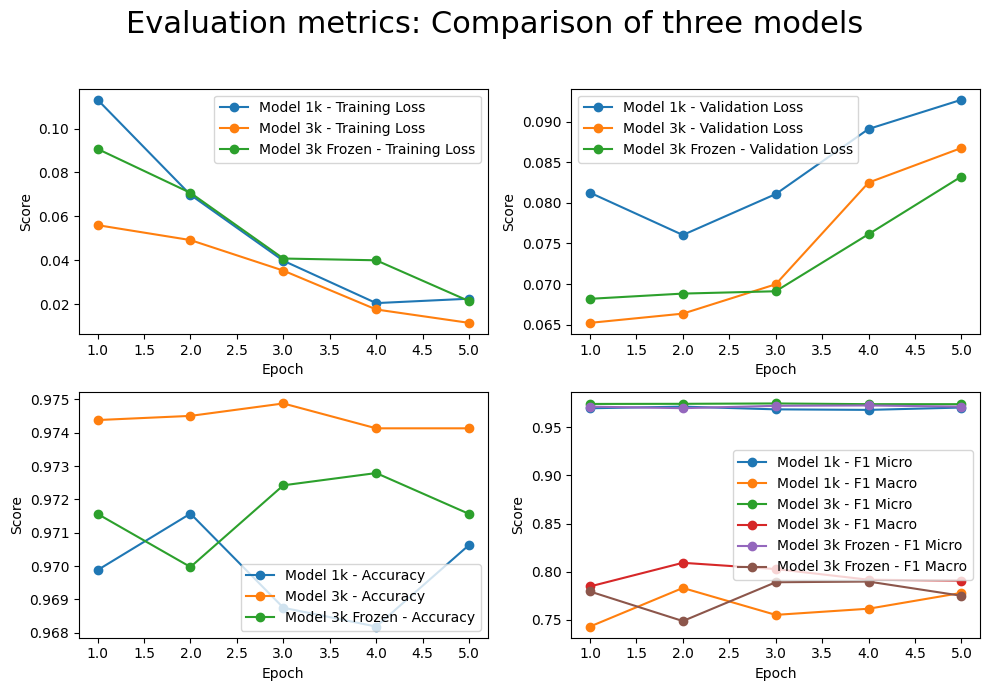

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO



df_1k = pd.read_csv(StringIO(data_str_1k), delimiter='\t')
df_3k = pd.read_csv(StringIO(data_str_3k), delimiter='\t')
df_3k_frozen = pd.read_csv(StringIO(data_str_3k_frozen), delimiter='\t')


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))


models = ["Model 1k", "Model 3k", "Model 3k Frozen"]
dfs = [df_1k, df_3k, df_3k_frozen]


for model, df in zip(models, dfs):
    # Plot Training Loss
    axes[0, 0].plot(df['Epoch'], df['Training Loss'], marker='o', label=f'{model} - Training Loss')

    # Plot Validation Loss
    axes[0, 1].plot(df['Epoch'], df['Validation Loss'], marker='o', label=f'{model} - Validation Loss')

    # Plot Accuracy
    axes[1, 0].plot(df['Epoch'], df['Accuracy'], marker='o', label=f'{model} - Accuracy')

    # Plot F1 Micro and F1 Macro
    axes[1, 1].plot(df['Epoch'], df['F1 Micro'], marker='o', label=f'{model} - F1 Micro')
    axes[1, 1].plot(df['Epoch'], df['F1 Macro'], marker='o', label=f'{model} - F1 Macro')


for ax in axes.flat:
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Score')

plt.suptitle("Evaluation metrics: Comparison of three models\n", fontsize=22)
plt.tight_layout()
plt.show()